In [3]:
# Install if necessary (uncomment the next lines)
# !pip install scikit-learn
# !pip install matplotlib seaborn

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [4]:
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv("network_traffic_dataset.csv")


Saving network_traffic_dataset.csv to network_traffic_dataset.csv


In [5]:
# Check data structure
df.head()

# Basic info
df.info()

# Check for missing values
print(df.isnull().sum())

# Label distribution
print(df['Label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Duration     100 non-null    float64
 1   Protocol     100 non-null    object 
 2   Src_Port     100 non-null    int64  
 3   Dst_Port     100 non-null    int64  
 4   Packet_Size  100 non-null    int64  
 5   Flag         100 non-null    object 
 6   Label        100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB
Duration       0
Protocol       0
Src_Port       0
Dst_Port       0
Packet_Size    0
Flag           0
Label          0
dtype: int64
Label
Normal     90
Anomaly    10
Name: count, dtype: int64


In [6]:
label_enc = LabelEncoder()
df['Protocol'] = label_enc.fit_transform(df['Protocol'])
df['Flag'] = label_enc.fit_transform(df['Flag'])
df['Label'] = label_enc.fit_transform(df['Label'])  # Normal=0, Anomaly=1


In [7]:
scaler = MinMaxScaler()
scaled_cols = ['Duration', 'Src_Port', 'Dst_Port', 'Packet_Size']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


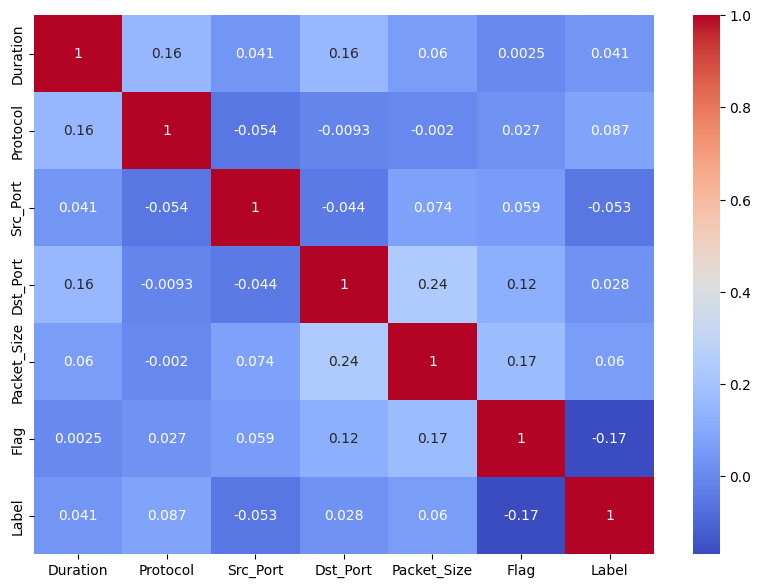

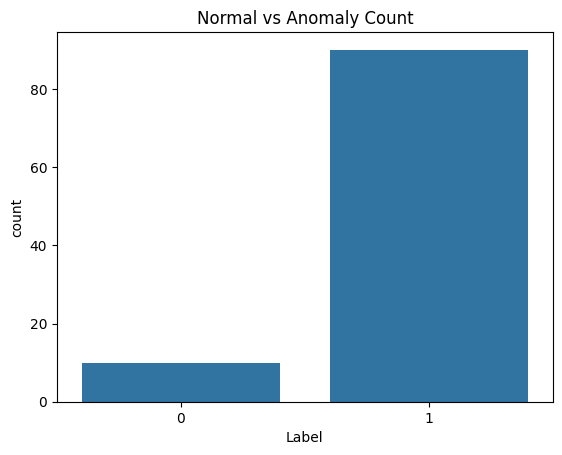

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Class Distribution
sns.countplot(x='Label', data=df)
plt.title("Normal vs Anomaly Count")
plt.show()


In [9]:
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = IsolationForest(contamination=0.15, random_state=42)
model.fit(X_train)

# Predict anomalies
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Map -1 (anomaly) to 1, 1 (normal) to 0
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)


Train Set:
              precision    recall  f1-score   support

           0       0.09      0.86      0.16         7
           1       0.92      0.15      0.26        73

    accuracy                           0.21        80
   macro avg       0.50      0.50      0.21        80
weighted avg       0.84      0.21      0.25        80

Test Set:
              precision    recall  f1-score   support

           0       0.12      0.67      0.20         3
           1       0.67      0.12      0.20        17

    accuracy                           0.20        20
   macro avg       0.39      0.39      0.20        20
weighted avg       0.58      0.20      0.20        20



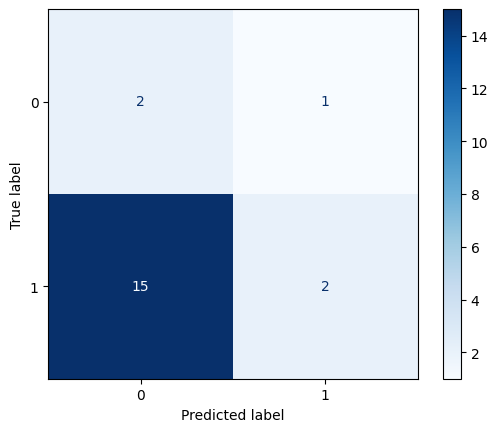

In [11]:
# Training set performance
print("Train Set:")
print(classification_report(y_train, y_pred_train))

# Test set performance
print("Test Set:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix for test set
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [12]:
print(f"Anomalies detected in test set: {sum(y_pred_test)} out of {len(y_pred_test)} samples")


Anomalies detected in test set: 3 out of 20 samples
